<a href="https://colab.research.google.com/github/Sahar-bgi/python/blob/main/Blood_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install kaggle

In [9]:
from google.colab import files
# upload the Kaggle API
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saharbg","key":"f0530ad616f5bc57490881312d771772"}'}

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d unclesamulus/blood-cells-image-dataset

 98% 261M/268M [00:03<00:00, 89.4MB/s]
100% 268M/268M [00:03<00:00, 85.5MB/s]


In [13]:
!unzip /content/blood-cells-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: bloodcells_dataset/neutrophil/BNE_448273.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_44875.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_448776.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_449730.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_449915.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_450464.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_451701.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_451729.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_453088.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_454089.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_454943.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_455080.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_4555.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_455636.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_45575.jpg  
  inflating: bloodcells_dataset/neutrophil/BNE_456543

In [14]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import itertools

#Import image read library
from PIL import Image

#Import ML library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score , confusion_matrix

In [15]:
import pathlib
data_dir = '/content/bloodcells_dataset'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset='validation',
    seed = 123,
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.
Found 17092 files belonging to 8 classes.
Using 5127 files for validation.


In [17]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(8,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
#train the model1
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
428/428 [==============================] - 2283s 5s/step - loss: 0.5509 - accuracy: 0.7991 - val_loss: 0.5297 - val_accuracy: 0.8149
Epoch 2/5
428/428 [==============================] - 2244s 5s/step - loss: 0.3529 - accuracy: 0.8758 - val_loss: 0.2582 - val_accuracy: 0.9107
Epoch 3/5
428/428 [==============================] - 2205s 5s/step - loss: 0.2458 - accuracy: 0.9109 - val_loss: 0.2203 - val_accuracy: 0.9302
Epoch 4/5
428/428 [==============================] - 2263s 5s/step - loss: 0.1860 - accuracy: 0.9361 - val_loss: 0.2663 - val_accuracy: 0.9097
Epoch 5/5
428/428 [==============================] - 2214s 5s/step - loss: 0.1437 - accuracy: 0.9501 - val_loss: 0.2139 - val_accuracy: 0.9345


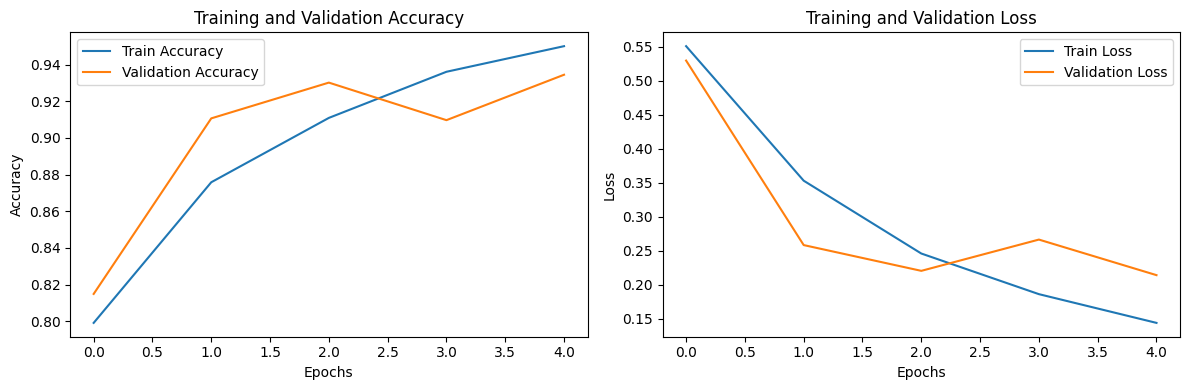

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 [==============================] - 1s 618ms/step


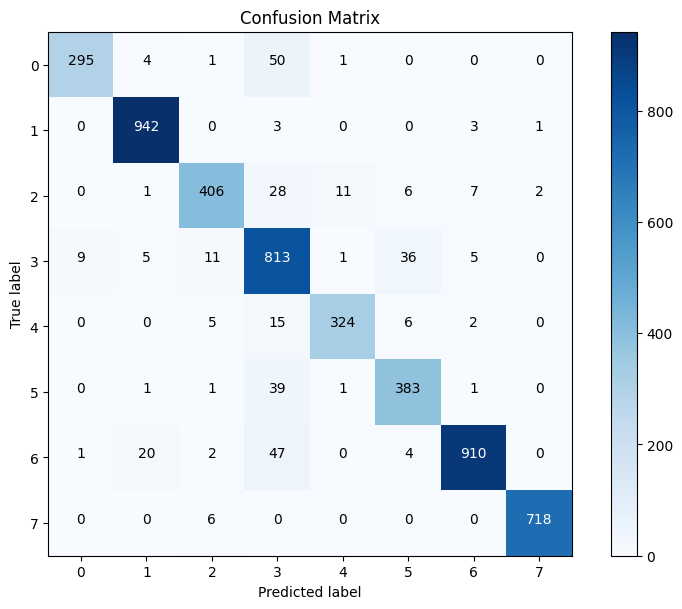

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Obtain true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in validation_ds:
    true_labels.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to integers
    predicted_labels.extend(np.argmax(model.predict(images), axis=1))  # Predict labels using the model

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
num_classes = cm.shape[0]
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))

# Adding annotations
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
